# Reading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house-prices-advanced-regression-techniques/train.csv')

df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house-prices-advanced-regression-techniques/test.csv')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

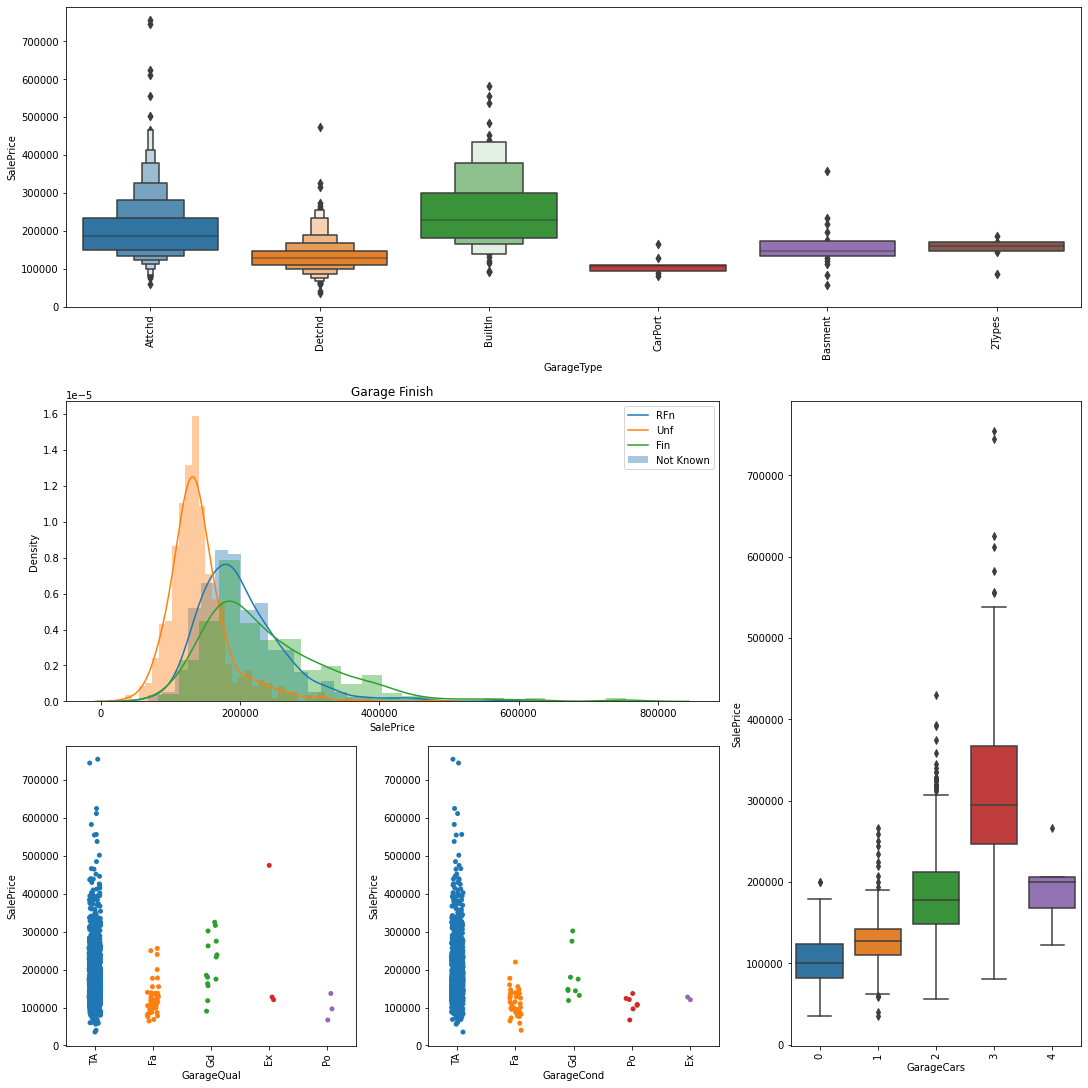

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

import seaborn as sns

#Plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff



fig = plt.figure(constrained_layout=True,figsize=(15,15))
gs = GridSpec(3, 3, figure=fig)

plt.subplot(gs[0,:])
a1 = sns.boxenplot(data=df,x="GarageType",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:-1])
sns.distplot(df[df['GarageFinish']=='RFn']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Unf']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Fin']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Not Known']['SalePrice'])

plt.legend('upper right' , labels = ['RFn','Unf','Fin','Not Known'])
plt.xlabel("SalePrice")
plt.title("Garage Finish")

plt.subplot(gs[1:,-1])
a1 = sns.boxplot(data=df,x="GarageCars",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,0])
a1 = sns.stripplot(data=df,x="GarageQual",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,-2])
a1 = sns.stripplot(data=df,x="GarageCond",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);


# Getting insight 

In [6]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
print('The dataset contains {} rows and {} columns.'.format(len(df), len(df.columns)))

The dataset contains 1460 rows and 81 columns.


# Dealing with missing values

In [9]:

pd.options.display.max_rows=None 
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
df.shape

(1460, 81)

Getting numerical and categorical column

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()
print(list(numeric_cols))
print(list(categorical_cols))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gara

Dealing with numerical columns

In [12]:
missing_counts = df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean') 
imputer.fit(df[numeric_cols])
df[numeric_cols] = imputer.transform(df[numeric_cols])

In [14]:
missing_counts = df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0] 

Series([], dtype: int64)

Dealing with Categorical data

For Alley
 

In [15]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [16]:
df['Alley'].mode()

0    Grvl
dtype: object

In [17]:
df['Alley'].value_counts(normalize=True, dropna=False)

NaN     0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64

In [18]:
df['Alley'].value_counts(normalize=True)

Grvl    0.549451
Pave    0.450549
Name: Alley, dtype: float64

In [19]:
df.drop('Alley', axis=1, inplace=True)

## For  All Bsmt

In [20]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [21]:
df['BsmtQual'].value_counts(normalize=True, dropna=False)

TA     0.444521
Gd     0.423288
Ex     0.082877
NaN    0.025342
Fa     0.023973
Name: BsmtQual, dtype: float64

In [22]:
df['BsmtQual'].value_counts(normalize=True, dropna=True)

TA    0.456079
Gd    0.434294
Ex    0.085032
Fa    0.024596
Name: BsmtQual, dtype: float64

In [23]:
df['BsmtQual'] = df['BsmtQual'].fillna(pd.Series(np.random.choice(['TA','Gd','Ex','Fa'],p=[0.45,0.43,0.1,0.02], size=len(df)),index=df.index))

In [24]:
df['BsmtQual'].value_counts(normalize=True, dropna=True)

TA    0.456164
Gd    0.435616
Ex    0.084247
Fa    0.023973
Name: BsmtQual, dtype: float64

In [25]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [26]:
df['BsmtCond'].value_counts(normalize=True, dropna=False)

TA     0.897945
Gd     0.044521
Fa     0.030822
NaN    0.025342
Po     0.001370
Name: BsmtCond, dtype: float64

In [27]:
df['BsmtCond'].value_counts(normalize=True, dropna=True)

TA    0.921293
Gd    0.045678
Fa    0.031623
Po    0.001405
Name: BsmtCond, dtype: float64

In [28]:
df['BsmtCond'] = df['BsmtCond'].fillna(pd.Series(np.random.choice(['TA','Gd','Fa','Po'],p=[0.921,0.045,0.033,0.001], size=len(df)),index=df.index))

In [29]:
#pd.options.display.max_rows=None ## shows all the rows
#df.isnull().sum()

In [30]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [31]:
df['BsmtExposure'].value_counts(normalize=True, dropna=False)

No     0.652740
Av     0.151370
Gd     0.091781
Mn     0.078082
NaN    0.026027
Name: BsmtExposure, dtype: float64

In [32]:
df['BsmtExposure'].value_counts(normalize=True, dropna=True)

No    0.670183
Av    0.155415
Gd    0.094233
Mn    0.080169
Name: BsmtExposure, dtype: float64

In [33]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(pd.Series(np.random.choice(['No','Av','Gd','Mn'],p=[0.670,0.155,0.09,0.085], size=len(df)),index=df.index))

In [34]:
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [35]:
df['BsmtFinType1'].value_counts(normalize=True, dropna=True)

Unf    0.302178
GLQ    0.293746
ALQ    0.154603
BLQ    0.104006
Rec    0.093465
LwQ    0.052003
Name: BsmtFinType1, dtype: float64

In [36]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(pd.Series(np.random.choice(['Unf','GLQ','ALQ','BLQ','Rec','LwQ'],p=[0.30,0.30,0.15,0.10,0.10,0.05], size=len(df)),index=df.index))

In [37]:
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [38]:
df['BsmtFinType2'].value_counts(normalize=True, dropna=False)

Unf    0.860274
Rec    0.036986
LwQ    0.031507
NaN    0.026027
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64

In [39]:
df['BsmtFinType2'].value_counts(normalize=True, dropna=True)

Unf    0.883263
Rec    0.037975
LwQ    0.032349
BLQ    0.023207
ALQ    0.013361
GLQ    0.009845
Name: BsmtFinType2, dtype: float64

In [40]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(pd.Series(np.random.choice(['Unf','Rec','LwQ','BLQ','ALQ','GLQ'],p=[0.88,0.04,0.03,0.025,0.015,0.01], size=len(df)),index=df.index))

In [41]:
#pd.options.display.max_rows=None ## shows all the rows
#df.isnull().sum()

## For All MasVnr

In [42]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [43]:
df['MasVnrType'].value_counts(normalize=True, dropna=False)

None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
NaN        0.005479
Name: MasVnrType, dtype: float64

In [44]:
df['MasVnrType'].value_counts(normalize=True, dropna=True)

None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64

In [45]:
df['MasVnrType'] = df['MasVnrType'].fillna(pd.Series(np.random.choice(['None','BrkFace','Stone','BrkCmn'],p=[0.60,0.30,0.09,0.01], size=len(df)),index=df.index))

In [46]:
#df['MasVnrArea'].unique()

In [47]:
#df['MasVnrArea'].mean()

In [48]:
#df['MasVnrArea'].mode()

In [49]:
#df['MasVnrArea'].fillna(103.68526170798899, inplace = True)

In [50]:
#pd.options.display.max_rows=None ## shows all the rows
#df.isnull().sum()

## For Electrical

In [51]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [52]:
df['Electrical'].value_counts(normalize=True, dropna=False)

SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
NaN      0.000685
Name: Electrical, dtype: float64

In [53]:
df['Electrical'].fillna('SBrkr', inplace = True)

## FireplaceQu

In [54]:
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [55]:
df['FireplaceQu'].value_counts(normalize=True, dropna=False)

NaN    0.472603
Gd     0.260274
TA     0.214384
Fa     0.022603
Ex     0.016438
Po     0.013699
Name: FireplaceQu, dtype: float64

In [56]:
df.drop('FireplaceQu', axis=1, inplace=True)

## For All Garage

In [57]:
#pd.options.display.max_rows=None ## shows all the rows
#df.isnull().sum()

In [58]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [59]:
#df['GarageYrBlt'].unique()

In [60]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [61]:
df['GarageType'].value_counts(normalize=True, dropna=False)

Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
NaN        0.055479
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64

In [62]:
df['GarageType'].value_counts(normalize=True, dropna=True)

Attchd     0.630892
Detchd     0.280638
BuiltIn    0.063814
Basment    0.013778
CarPort    0.006526
2Types     0.004351
Name: GarageType, dtype: float64

In [63]:
df['GarageType'].fillna('Attchd', inplace = True)

In [64]:
#df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace = True)

In [65]:
df['GarageFinish'].value_counts(normalize=True, dropna=False)

Unf    0.414384
RFn    0.289041
Fin    0.241096
NaN    0.055479
Name: GarageFinish, dtype: float64

In [66]:
df['GarageFinish'].fillna('Unf', inplace = True)

In [67]:
#pd.options.display.max_rows=None ## shows all the rows
#df.isnull().sum()

In [68]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [69]:
df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [70]:
df['GarageQual'].value_counts(normalize=True, dropna=True)

TA    0.950689
Fa    0.034808
Gd    0.010152
Ex    0.002175
Po    0.002175
Name: GarageQual, dtype: float64

In [71]:
df['GarageCond'].value_counts(normalize=True, dropna=False)

TA     0.908219
NaN    0.055479
Fa     0.023973
Gd     0.006164
Po     0.004795
Ex     0.001370
Name: GarageCond, dtype: float64

In [72]:
df['GarageQual'].fillna('TA', inplace = True)

In [73]:
df['GarageCond'].fillna('TA', inplace = True)

## Dropping Column With major missing

In [74]:
#pd.options.display.max_rows=None ## shows all the rows
#df.isnull().sum()

In [75]:
df.drop('PoolQC', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)
df.drop('MiscFeature', axis=1, inplace=True)

## Checking missing values in table

In [76]:
pd.options.display.max_rows=None ## shows all the rows
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [77]:
import seaborn as sns
import seaborn as sn

# Correlation

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
df.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.009601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.357056 -0.139781     0.032628   
LotFrontage   -0.009601   -0.357056     1.000000  0.306795     0.234196   
LotArea       -0.033226   -0.139781     0.306795  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.234196  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.052820 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.117598  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.082746  0.013788     0.550684   
MasVnrArea    -0.050199    0.022895     0.179283  0.103960     0.410238   
BsmtFinSF1    -0.005024   -0.069836     0.215828  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.043340  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.122156 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.363358  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.414266  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.072483  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.036849  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.368392  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.091481  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.006419  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.180424  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.048258  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.237023  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.005805 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.320146  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.235755  0.271364     0.396765   
GarageYrBlt    0.000070    0.080187     0.064324 -0.024812     0.518018   
GarageCars     0.016570   -0.040110     0.269729  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.323663  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.077106  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.137454  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.009790 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.062335  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.037684  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.180868  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.001168  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.010158  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.006768 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.334901  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050199   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022895   -0.069836   
LotFrontage      -0.052820   0.117598      0.082746    0.179283    0.215828   
LotArea          -0.005636   0.014228      0.013788    0.103960    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.410238    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.127788   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.314745    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179186    0.128451   
MasVnrArea       -0.127788   0.314745      0.179186    1.000000    0.263582   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.263582    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072302   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114184   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.362452    0

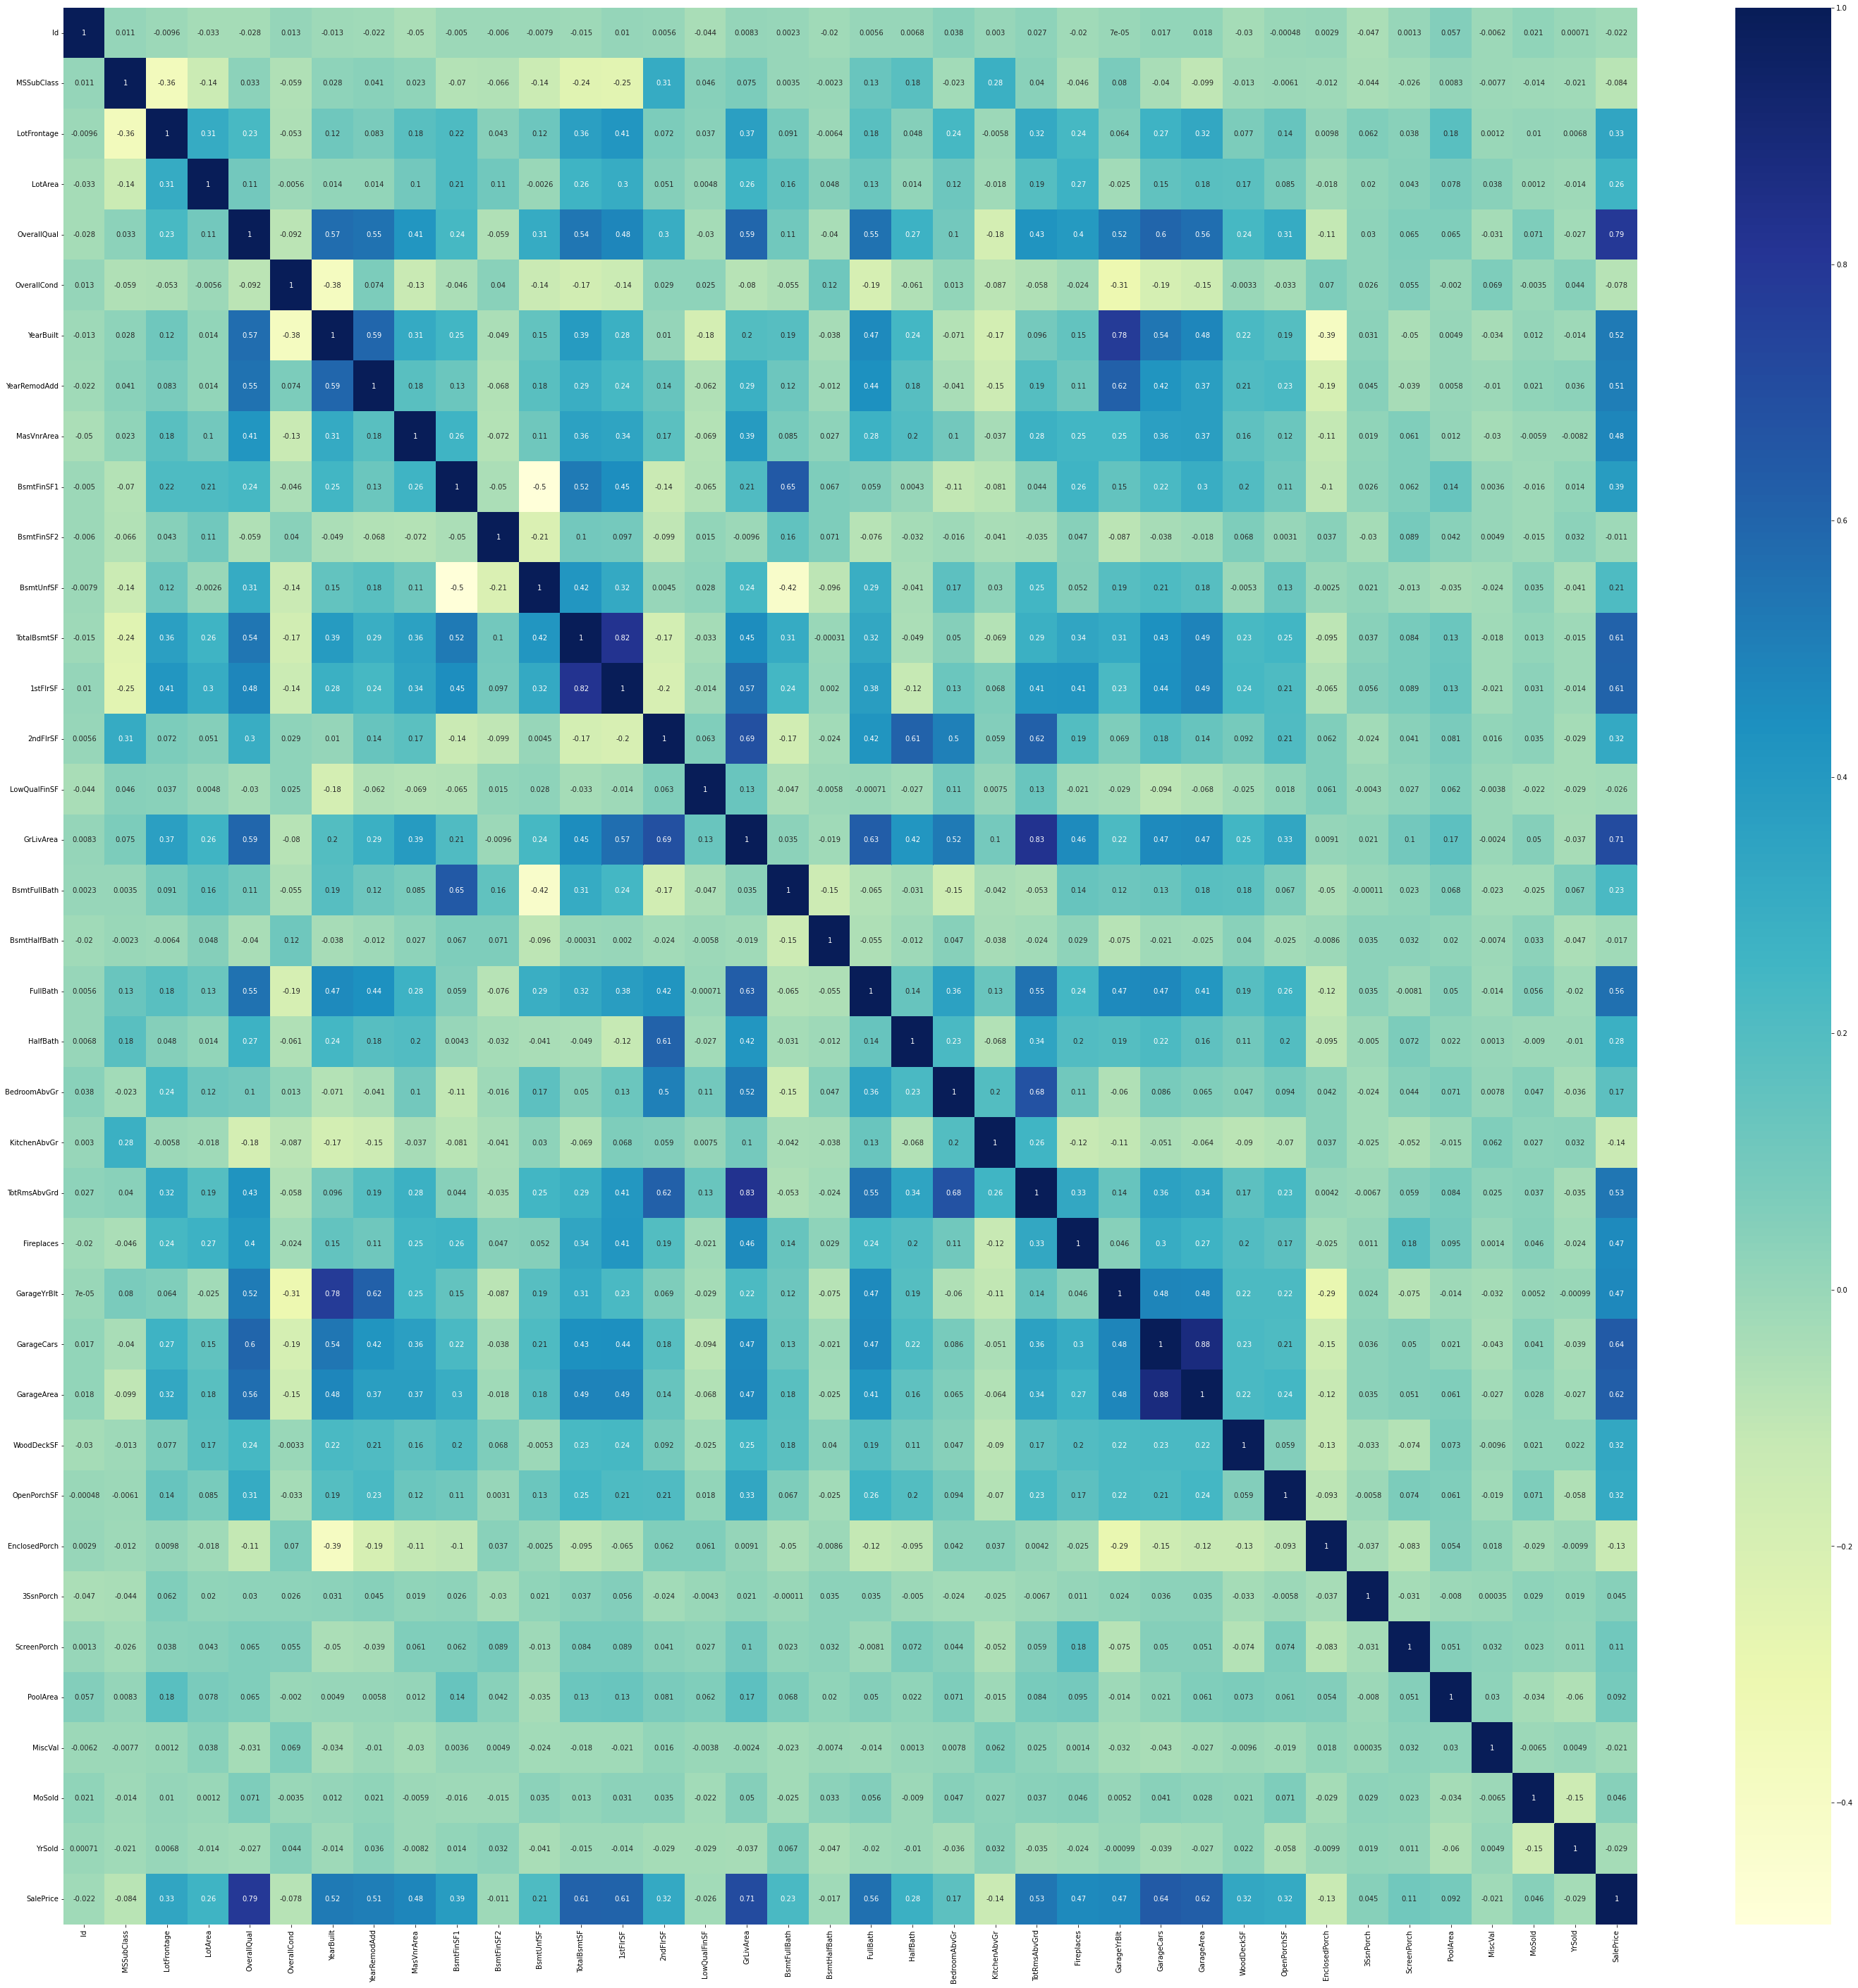

In [80]:
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

# Encoding

In [81]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  1.0        60.0       RL         65.0   8450.0   Pave      Reg         Lvl   
1  2.0        20.0       RL         80.0   9600.0   Pave      Reg         Lvl   
2  3.0        60.0       RL         68.0  11250.0   Pave      IR1         Lvl   
3  4.0        70.0       RL         60.0   9550.0   Pave      IR1         Lvl   
4  5.0        60.0       RL         84.0  14260.0   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...           0.0       0.0         0.0      0.0   
1    AllPub       FR2  ...           0.0       0.0         0.0      0.0   
2    AllPub    Inside  ...           0.0       0.0         0.0      0.0   
3    AllPub    Corner  ...         272.0       0.0         0.0      0.0   
4    AllPub       FR2  ...           0.0       0.0         0.0      0.0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0     0.0    2.0  2008.0        WD         Normal   208500.0  
1     0.0    5.0  2007.0        WD         Normal   181500.0  
2     0.0    9.0  2008.0        WD         Normal   223500.0  
3     0.0    2.0  2006.0        WD        Abnorml   140000.0  
4     0.0   12.0  2008.0        WD         Normal   250000.0  

[5 rows x 76 columns]

In [82]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [83]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
df['MSZoning']= label_encoder.fit_transform(df['MSZoning'])
  
df['MSZoning'].unique()

array([3, 4, 0, 1, 2])

In [84]:
df['MSZoning'].head()

0    3
1    3
2    3
3    3
4    3
Name: MSZoning, dtype: int64

In [85]:
df['Street']= label_encoder.fit_transform(df['Street'])
df['LotShape']= label_encoder.fit_transform(df['LotShape'])
df['Utilities']= label_encoder.fit_transform(df['Utilities'])
df['LotConfig']= label_encoder.fit_transform(df['LotConfig'])

df['LandContour']= label_encoder.fit_transform(df['LandContour'])
df['LandSlope']= label_encoder.fit_transform(df['LandSlope'])
df['Neighborhood']= label_encoder.fit_transform(df['Neighborhood'])
df['Condition1']= label_encoder.fit_transform(df['Condition1'])
df['Condition2']= label_encoder.fit_transform(df['Condition2'])
df['BldgType']= label_encoder.fit_transform(df['BldgType'])
df['RoofStyle']= label_encoder.fit_transform(df['RoofStyle'])
df['RoofMatl']= label_encoder.fit_transform(df['RoofMatl'])
df['Exterior1st']= label_encoder.fit_transform(df['Exterior1st'])
df['Exterior2nd']= label_encoder.fit_transform(df['Exterior2nd'])
df['MasVnrType']= label_encoder.fit_transform(df['MasVnrType'])
df['ExterQual']= label_encoder.fit_transform(df['ExterQual'])
df['ExterCond']= label_encoder.fit_transform(df['ExterCond'])

df['Foundation']= label_encoder.fit_transform(df['Foundation'])
df['BsmtQual']= label_encoder.fit_transform(df['BsmtQual'])
df['BsmtCond']= label_encoder.fit_transform(df['BsmtCond'])
df['BsmtExposure']= label_encoder.fit_transform(df['BsmtExposure'])
df['BsmtFinType1']= label_encoder.fit_transform(df['BsmtFinType1'])

df['BsmtFinType2']= label_encoder.fit_transform(df['BsmtFinType2'])
df['Heating']= label_encoder.fit_transform(df['Heating'])
df['HeatingQC']= label_encoder.fit_transform(df['HeatingQC'])
df['CentralAir']= label_encoder.fit_transform(df['CentralAir'])
df['Electrical']= label_encoder.fit_transform(df['Electrical'])
df['KitchenQual']= label_encoder.fit_transform(df['KitchenQual'])
df['Functional']= label_encoder.fit_transform(df['Functional'])
df['GarageType']= label_encoder.fit_transform(df['GarageType'])

df['GarageFinish']= label_encoder.fit_transform(df['GarageFinish'])
df['GarageQual']= label_encoder.fit_transform(df['GarageQual'])
df['GarageCond']= label_encoder.fit_transform(df['GarageCond'])
df['PavedDrive']= label_encoder.fit_transform(df['PavedDrive'])
df['SaleType']= label_encoder.fit_transform(df['SaleType'])
df['SaleCondition']= label_encoder.fit_transform(df['SaleCondition'])

df['HouseStyle'] =label_encoder.fit_transform(df['HouseStyle'])


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

In [87]:
df.shape

(1460, 76)

# Normalization train data

In [88]:
df.drop('Utilities', axis=1, inplace=True)
df.drop('Id', axis=1, inplace=True)

df2.drop('Utilities', axis=1, inplace=True)
df2.drop('Id', axis=1, inplace=True)

In [89]:
X = df.drop(['SalePrice'], axis=1)
X = (X - X.min()) / (X.max() - X.min())
X

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
0       0.235294      0.75     0.150685  0.033420     1.0  1.000000   
1       0.000000      0.75     0.202055  0.038795     1.0  1.000000   
2       0.235294      0.75     0.160959  0.046507     1.0  0.000000   
3       0.294118      0.75     0.133562  0.038561     1.0  0.000000   
4       0.235294      0.75     0.215753  0.060576     1.0  0.000000   
5       0.176471      0.75     0.219178  0.059899     1.0  0.000000   
6       0.000000      0.75     0.184932  0.041057     1.0  1.000000   
7       0.235294      0.75     0.167979  0.042450     1.0  0.000000   
8       0.176471      1.00     0.102740  0.022529     1.0  1.000000   
9       1.000000      0.75     0.099315  0.028605     1.0  1.000000   
10      0.000000      0.75     0.167808  0.046274     1.0  1.000000   
11      0.235294      0.75     0.219178  0.049658     1.0  0.000000   
12      0.000000      0.75     0.167979  0.054537     1.0  0.333333   
13      0.000000      0.75     0.239726  0.043712     1.0  0.000000   
14      0.000000      0.75     0.167979  0.044965     1.0  0.000000   
15      0.147059      1.00     0.102740  0.022529     1.0  1.000000   
16      0.000000      0.75     0.167979  0.046465     1.0  0.000000   
17      0.411765      0.75     0.174658  0.044362     1.0  1.000000   
18      0.000000      0.75     0.154110  0.057935     1.0  1.000000   
19      0.000000      0.75     0.167808  0.029260     1.0  1.000000   
20      0.235294      0.75     0.273973  0.060366     1.0  0.000000   
21      0.147059      1.00     0.123288  0.028741     1.0  1.000000   
22      0.000000      0.75     0.184932  0.039459     1.0  1.000000   
23      0.588235      1.00     0.078767  0.013667     1.0  1.000000   
24      0.000000      0.75     0.167979  0.032466     1.0  0.000000   
25      0.000000      0.75     0.304795  0.060436     1.0  1.000000   
26      0.000000      0.75     0.133562  0.027577     1.0  1.000000   
27      0.000000      0.75     0.263699  0.047573     1.0  1.000000   
28      0.000000      0.75     0.089041  0.070210     1.0  0.000000   
29      0.058824      1.00     0.133562  0.023483     1.0  0.000000   
30      0.294118      0.00     0.099315  0.033654     1.0  1.000000   
31      0.000000      0.75     0.167979  0.033859     1.0  0.000000   
32      0.000000      0.75     0.219178  0.045568     1.0  1.000000   
33      0.000000      0.75     0.167808  0.043245     1.0  0.000000   
34      0.588235      0.75     0.133562  0.028105     1.0  1.000000   
35      0.235294      0.75     0.297945  0.056641     1.0  1.000000   
36      0.000000      0.75     0.311644  0.044680     1.0  1.000000   
37      0.000000      0.75     0.181507  0.033803     1.0  1.000000   
38      0.000000      0.75     0.160959  0.030952     1.0  1.000000   
39      0.411765      0.75     0.150685  0.022155     1.0  1.000000   
40      0.000000      0.75     0.215753  0.034392     1.0  1.000000   
41      0.000000      0.75     0.321918  0.072939     1.0  1.000000   
42      0.382353      0.75     0.167979  0.036832     1.0  0.000000   
43      0.000000      0.75     0.167979  0.036925     1.0  0.000000   
44      0.000000      0.75     0.167808  0.031059     1.0  1.000000   
45      0.588235      0.75     0.136986  0.029718     1.0  1.000000   
46      0.176471      0.75     0.092466  0.053855     1.0  0.000000   
47      0.000000      0.25     0.215753  0.045787     1.0  1.000000   
48      1.000000      1.00     0.041096  0.014751     1.0  1.000000   
49      0.000000      0.75     0.154110  0.030111     1.0  1.000000   
50      0.235294      0.75     0.167979  0.058749     1.0  0.333333   
51      0.176471      1.00     0.106164  0.023090     1.0  1.000000   
52      0.411765      1.00     0.304795  0.033523     0.0  0.333333   
53      0.000000      0.75     0.160959  0.228895     1.0  0.000000   
54      0.352941      0.75     0.133562  0.027269     1.0  1.000000   
55      0.000000      0.75    

In [90]:
y = df['SalePrice']

In [91]:
X.shape

(1460, 73)

In [92]:
y.shape


(1460,)

# Feature Selection

For different values of columns passed to models

in the following order
Linear Regression
Random Forest regressor
Decision tree regressor
Stochastic Gradient Descent Regressor

top 15 columns
79
80
75
77

top 45 columns
60
71
64
86

top 65 columns
82
83
74
82

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [94]:
# SelectKBest (here usually K should be selected using cross validation but for now lets say k = 50)
#from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

# 15,45,72

K = 65

selected_features_kbest = SelectKBest(score_func=mutual_info_regression, k=K)
feature_scores = selected_features_kbest.fit(X_train, y_train)


#selected_features_kbest = SelectKBest(score_func=f_regression, k=K)
#feature_scores = selected_features_kbest.fit(X_train, y_train)
scores = pd.DataFrame(feature_scores.scores_)
columns = pd.DataFrame(X_train.columns)

final_scores = pd.concat([columns, scores], axis=1)
final_scores.columns = ['Features', 'Score']

k_best_scores = final_scores.nlargest(K, "Score")

print(k_best_scores)

         Features     Score
14    OverallQual  0.547429
9    Neighborhood  0.508739
43      GrLivArea  0.501282
35    TotalBsmtSF  0.409548
57     GarageCars  0.367205
40       1stFlrSF  0.353676
58     GarageArea  0.350607
16      YearBuilt  0.346984
50    KitchenQual  0.305863
24      ExterQual  0.304434
27       BsmtQual  0.286733
55    GarageYrBlt  0.277696
46       FullBath  0.264633
0      MSSubClass  0.261698
56   GarageFinish  0.255264
17   YearRemodAdd  0.246774
51   TotRmsAbvGrd  0.232659
41       2ndFlrSF  0.213310
26     Foundation  0.177217
63    OpenPorchSF  0.171787
2     LotFrontage  0.170941
31     BsmtFinSF1  0.161674
53     Fireplaces  0.160757
3         LotArea  0.144558
37      HeatingQC  0.143261
54     GarageType  0.140910
30   BsmtFinType1  0.133758
21    Exterior2nd  0.132189
34      BsmtUnfSF  0.127178
1        MSZoning  0.123259
20    Exterior1st  0.111306
23     MasVnrArea  0.108325
22     MasVnrType  0.098135
15    OverallCond  0.097820
62     WoodDeckSF  0

In [95]:
k_best_scores['Features']

14      OverallQual
9      Neighborhood
43        GrLivArea
35      TotalBsmtSF
57       GarageCars
40         1stFlrSF
58       GarageArea
16        YearBuilt
50      KitchenQual
24        ExterQual
27         BsmtQual
55      GarageYrBlt
46         FullBath
0        MSSubClass
56     GarageFinish
17     YearRemodAdd
51     TotRmsAbvGrd
41         2ndFlrSF
26       Foundation
63      OpenPorchSF
2       LotFrontage
31       BsmtFinSF1
53       Fireplaces
3           LotArea
37        HeatingQC
54       GarageType
30     BsmtFinType1
21      Exterior2nd
34        BsmtUnfSF
1          MSZoning
20      Exterior1st
23       MasVnrArea
22       MasVnrType
15      OverallCond
62       WoodDeckSF
47         HalfBath
71         SaleType
13       HouseStyle
5          LotShape
29     BsmtExposure
72    SaleCondition
61       PavedDrive
39       Electrical
38       CentralAir
12         BldgType
64    EnclosedPorch
28         BsmtCond
48     BedroomAbvGr
7         LotConfig
6       LandContour


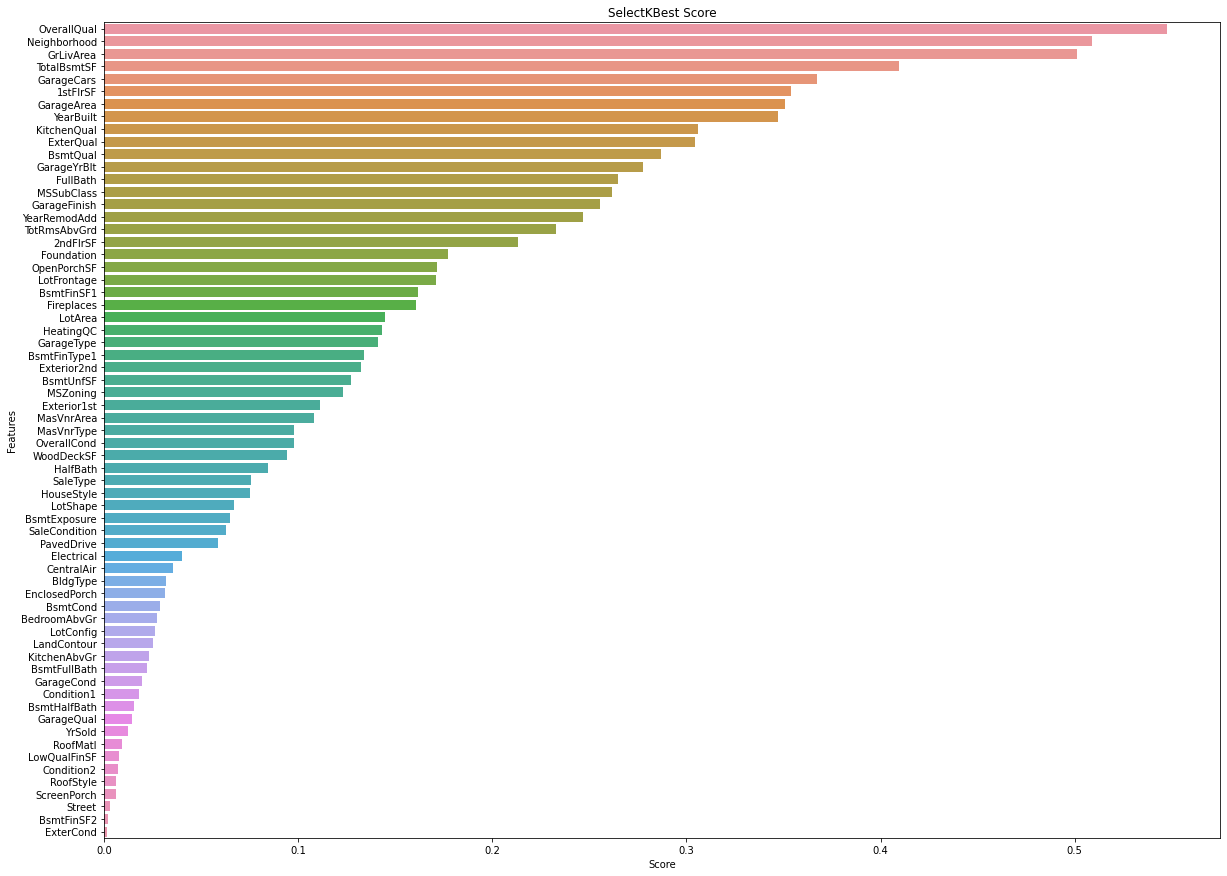

In [96]:
plt.figure(figsize=(20, 15))
plt.title("SelectKBest Score")
sns.barplot(x=k_best_scores["Score"], y=k_best_scores['Features'])

In [97]:
X_train = X_train[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]

In [98]:
X_train=X_train[k_best_scores['Features']]

In [99]:
X_train.head(5)

OverallQual  Neighborhood  GrLivArea  TotalBsmtSF  GarageCars  1stFlrSF  \
46      0.666667      0.458333   0.341937     0.234697        0.50  0.271684   
696     0.444444      0.125000   0.053127     0.100818        0.25  0.064709   
260     0.555556      0.500000   0.197438     0.222913        0.50  0.240477   
751     0.666667      0.333333   0.185757     0.108020        0.50  0.074805   
984     0.444444      0.458333   0.263753     0.000000        0.50  0.222120   

     GarageArea  YearBuilt  KitchenQual  ExterQual  ...  GarageQual  YrSold  \
46     0.472496   0.949275     0.666667   0.666667  ...         1.0    0.75   
696    0.144570   0.355072     1.000000   1.000000  ...         1.0    0.00   
260    0.623413   0.652174     1.000000   1.000000  ...         1.0    0.75   
751    0.282087   0.949275     0.666667   0.666667  ...         1.0    0.25   
984    0.380113   0.760870     0.666667   1.000000  ...         1.0    0.75   

     RoofMatl  LowQualFinSF  Condition2  RoofStyle  ScreenPorch  Street  \
46   0.142857           0.0    0.285714        0.2       0.4125     1.0   
696  0.142857           0.0    0.285714        0.2       0.0000     1.0   
260  0.142857           0.0    0.285714        0.2       0.0000     1.0   
751  0.142857           0.0    0.285714        0.2       0.0000     1.0   
984  0.142857           0.0    0.285714        0.2       0.0000     1.0   

     BsmtFinSF2  ExterCond  
46     0.000000        1.0  
696    0.000000        1.0  
260    0.468114        1.0  
751    0.000000        1.0  
984    0.000000        1.0  

[5 rows x 65 columns]

In [100]:
X_train.shape

(1022, 65)

In [101]:
X_test = X_test[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]

In [102]:
X_test=X_test[k_best_scores['Features']]

In [103]:
X_test.shape

(438, 65)

# Modeling

## Linear Regression

In [104]:
X_train.shape

(1022, 65)

In [105]:
y_train.shape

(1022,)

In [106]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [107]:
LR.coef_ #basically the weight

array([ 1.23470787e+05,  6.38525660e+03, -2.20622277e+17,  2.32064601e+17,
        5.22698793e+04,  1.81136376e+17, -8.33857430e+03,  1.97018508e+04,
       -3.20550182e+04, -2.17312322e+04, -2.47947973e+04, -3.24374257e+03,
        1.31421785e+04, -2.64445669e+04, -2.69191707e+02,  5.33180879e+02,
        3.36620501e+04,  8.58298798e+16,  3.47511422e+03, -1.43610786e+04,
       -5.50703027e+04, -2.14365402e+17,  1.45266891e+04,  8.22236621e+04,
       -3.14308396e+03, -2.69192266e+03, -5.09755793e+03, -5.03756231e+03,
       -8.87238801e+16, -1.03871414e+04, -6.33707503e+03,  5.57356231e+04,
        1.76753180e+04,  3.77500000e+04,  1.39680000e+04, -3.02400000e+03,
        1.92600000e+03, -7.36000000e+03, -4.70400000e+03, -1.15040000e+04,
        7.04000000e+03, -1.60000000e+02, -2.80000000e+03, -1.17600000e+03,
       -7.95200000e+03,  7.18400000e+03,  6.34800000e+03, -3.08920000e+04,
       -6.40000000e+01,  1.14080000e+04, -2.90820000e+04,  3.16000000e+04,
        1.24560000e+04, -

In [108]:
LR.intercept_ #y=mx+c thats the C value constant

53612.18199608612

In [109]:
coeff_df=pd.DataFrame(LR.coef_,index=X_train.columns,columns=['Coeff'])
coeff_df

Coeff
OverallQual    1.234708e+05
Neighborhood   6.385257e+03
GrLivArea     -2.206223e+17
TotalBsmtSF    2.320646e+17
GarageCars     5.226988e+04
1stFlrSF       1.811364e+17
GarageArea    -8.338574e+03
YearBuilt      1.970185e+04
KitchenQual   -3.205502e+04
ExterQual     -2.173123e+04
BsmtQual      -2.479480e+04
GarageYrBlt   -3.243743e+03
FullBath       1.314218e+04
MSSubClass    -2.644457e+04
GarageFinish  -2.691917e+02
YearRemodAdd   5.331809e+02
TotRmsAbvGrd   3.366205e+04
2ndFlrSF       8.582988e+16
Foundation     3.475114e+03
OpenPorchSF   -1.436108e+04
LotFrontage   -5.507030e+04
BsmtFinSF1    -2.143654e+17
Fireplaces     1.452669e+04
LotArea        8.222366e+04
HeatingQC     -3.143084e+03
GarageType    -2.691923e+03
BsmtFinType1  -5.097558e+03
Exterior2nd   -5.037562e+03
BsmtUnfSF     -8.872388e+16
MSZoning      -1.038714e+04
Exterior1st   -6.337075e+03
MasVnrArea     5.573562e+04
MasVnrType     1.767532e+04
OverallCond    3.775000e+04
WoodDeckSF     1.396800e+04
HalfBath      -3.024000e+03
SaleType       1.926000e+03
HouseStyle    -7.360000e+03
LotShape      -4.704000e+03
BsmtExposure  -1.150400e+04
SaleCondition  7.040000e+03
PavedDrive    -1.600000e+02
Electrical    -2.800000e+03
CentralAir    -1.176000e+03
BldgType      -7.952000e+03
EnclosedPorch  7.184000e+03
BsmtCond       6.348000e+03
BedroomAbvGr  -3.089200e+04
LotConfig     -6.400000e+01
LandContour    1.140800e+04
KitchenAbvGr  -2.908200e+04
BsmtFullBath   3.160000e+04
GarageCond     1.245600e+04
Condition1    -7.520000e+03
BsmtHalfBath   6.864000e+03
GarageQual     2.800000e+03
YrSold        -4.384000e+03
RoofMatl       4.208800e+04
LowQualFinSF   2.377467e+16
Condition2    -6.259388e+04
RoofStyle      2.124800e+04
ScreenPorch    2.582000e+04
Street         4.568000e+03
BsmtFinSF2    -5.598416e+16
ExterCond      3.588000e+03

In [110]:
X_test

OverallQual  Neighborhood  GrLivArea  TotalBsmtSF  GarageCars  1stFlrSF  \
948      0.666667      0.208333   0.271665     0.153191        0.50  0.138137   
964      0.666667      0.958333   0.293896     0.133715        0.50  0.112437   
573      0.666667      0.333333   0.206481     0.062848        0.50  0.100964   
134      0.444444      0.791667   0.261304     0.239116        0.50  0.318265   
1223     0.444444      0.500000   0.339488     0.349591        0.50  0.413492   
1107     0.666667      0.333333   0.317822     0.142062        0.50  0.126893   
864      0.666667      0.875000   0.195554     0.224550        0.50  0.238183   
343      0.888889      0.666667   0.254333     0.275614        0.50  0.309775   
1426     0.666667      0.625000   0.337792     0.200164        0.50  0.203993   
1148     0.666667      0.708333   0.146383     0.093617        0.25  0.054612   
251      0.777778      0.250000   0.243218     0.257447        0.50  0.296237   
457      0.333333      0.166667   0.250377     0.223241        0.50  0.304956   
1243     1.000000      0.666667   0.328184     0.339771        0.75  0.399725   
1260     0.555556      0.333333   0.252638     0.137643        0.50  0.128040   
1028     0.444444      0.500000   0.196307     0.125696        0.25  0.145480   
1451     0.777778      0.875000   0.234363     0.257447        0.75  0.285452   
186      0.666667      0.458333   0.166353     0.194435        0.50  0.202616   
968      0.222222      0.708333   0.119442     0.098200        0.00  0.061037   
809      0.444444      0.708333   0.339864     0.138953        0.50  0.170032   
86       0.555556      0.333333   0.230972     0.111948        0.50  0.080312   
41       0.444444      0.958333   0.187265     0.220949        0.25  0.228086   
1450     0.444444      0.500000   0.274680     0.146645        0.00  0.128958   
894      0.444444      0.833333   0.226262     0.000000        0.50  0.275585   
106      0.333333      0.708333   0.134326     0.104910        0.25  0.163607   
1113     0.444444      0.500000   0.126978     0.164975        0.25  0.154658   
639      0.777778      0.000000   0.232291     0.248773        0.75  0.282928   
143      0.666667      0.208333   0.219857     0.243863        0.50  0.267783   
560      0.444444      0.791667   0.199322     0.227823        0.50  0.242772   
624      0.555556      0.583333   0.274303     0.119804        0.50  0.155576   
1364     0.666667      0.875000   0.163150     0.098200        0.50  0.042680   
1160     0.555556      0.541667   0.211379     0.139935        0.50  0.119550   
725      0.333333      0.500000   0.099849     0.141408        0.50  0.121615   
688      0.777778      0.916667   0.204408     0.232242        0.50  0.248967   
448      0.555556      0.375000   0.196307     0.127660        0.25  0.102341   
765      0.888889      0.875000   0.220799     0.245172        0.50  0.268931   
197      0.777778      0.500000   0.523361     0.222586        0.50  0.235429   
922      0.555556      0.333333   0.185004     0.215385        0.50  0.225333   
701      0.666667      0.583333   0.156368     0.190507        0.50  0.190454   
179      0.444444      0.708333   0.119442     0.158429        0.50  0.145480   
1021     0.666667      0.208333   0.166918     0.196236        0.50  0.203304   
912      0.444444      0.125000   0.128297     0.125696        0.25  0.156264   
1088     0.666667      0.291667   0.259043     0.158756        0.50  0.145939   
150      0.444444      0.208333   0.119631     0.158592        0.50  0.145709   
130      0.666667      0.500000   0.343444     0.151227        0.50  0.202386   
67       0.666667      0.208333   0.215712     0.237807        0.50  0.262735   
563      0.555556      0.291667   0.252449     0.190344        0.50  0.190225   
892      0.555556      0.791667   0.138282     0.173322        0.25  0.168426   
541      0.777778      0.625000   0.367558     0.158592        0.75  0.152134   
125      0.555556      0.375000   0.0

In [111]:
y_preds = LR.predict(X_test) # passing test values to predict

In [112]:
y_preds #the predicted prices 

array([214342.53410795, 219953.35227209, 173168.30609813, 166618.93600565,
       149602.00465304, 217216.45826238, 211368.07731   , 312658.36929715,
       249234.93278551, 133309.98517749, 261167.55706734, 221621.4255097 ,
       343505.22141655, 168351.29159571, 123414.68199609, 272123.84996695,
       196159.95215025,  51164.68445285, 150241.36882525, 185785.16324098,
       135141.16064333, 106553.3505222 ,  97641.37756581, 100751.37731   ,
       136285.91064333, 275094.81017658, 219683.4864889 , 170578.29631971,
       186650.70996405, 153772.78199609, 150139.05822348, 108262.18199609,
       246936.37495642, 130671.18445285, 274153.34996695, 252618.18199609,
       184157.94895527, 153163.00465304, 111420.49397666, 223458.04852782,
       101699.7004984 , 188887.06425266, 119474.32731   , 221356.13416629,
       229150.15315557, 188474.60870412, 154180.38086892, 252654.01893875,
        91382.78199609, 184537.57731   , 233724.18199609, 256711.34094774,
       268097.11803345,  

In [113]:
y_preds.shape

(438,)

In [114]:
from sklearn.metrics import mean_squared_error,r2_score #imported for result

In [115]:
mean_squared_error(y_preds,y_test) #comparing predicted values with test values

855806742.2183961

In [116]:
np.sqrt(mean_squared_error(y_preds,y_test)) #mean error #doesnt make sense because prices in millions

29254.174782727954

In [117]:
r2_score(y_test,y_preds) #closer to 1 means good model 

0.8508505834919988

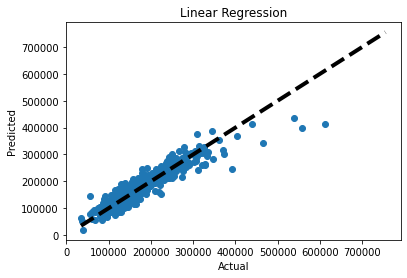

In [118]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

#regression line

#y_test.values.reshape(-1,1)
#yt_preds.reshape(-1,1)

#y_test, y_predicted = y_test.reshape(-1,1), yt_preds.values.reshape(-1,1)
ax.set_title('Linear Regression')

plt.show()

## Random Forest Regression

In [119]:
from sklearn.ensemble import RandomForestRegressor


In [120]:
X_train.head(3)

OverallQual  Neighborhood  GrLivArea  TotalBsmtSF  GarageCars  1stFlrSF  \
46      0.666667      0.458333   0.341937     0.234697        0.50  0.271684   
696     0.444444      0.125000   0.053127     0.100818        0.25  0.064709   
260     0.555556      0.500000   0.197438     0.222913        0.50  0.240477   

     GarageArea  YearBuilt  KitchenQual  ExterQual  ...  GarageQual  YrSold  \
46     0.472496   0.949275     0.666667   0.666667  ...         1.0    0.75   
696    0.144570   0.355072     1.000000   1.000000  ...         1.0    0.00   
260    0.623413   0.652174     1.000000   1.000000  ...         1.0    0.75   

     RoofMatl  LowQualFinSF  Condition2  RoofStyle  ScreenPorch  Street  \
46   0.142857           0.0    0.285714        0.2       0.4125     1.0   
696  0.142857           0.0    0.285714        0.2       0.0000     1.0   
260  0.142857           0.0    0.285714        0.2       0.0000     1.0   

     BsmtFinSF2  ExterCond  
46     0.000000        1.0  
696    0.000000        1.0  
260    0.468114        1.0  

[3 rows x 65 columns]

In [121]:
X_train.shape

(1022, 65)

In [122]:
LR_Forest=RandomForestRegressor(n_estimators = 12,max_depth=30,max_leaf_nodes=110 ) # This means 12 Trees

In [123]:
LR_Forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, max_leaf_nodes=110, n_estimators=12)

In [124]:
yf_preds=LR_Forest.predict(X_test)

In [125]:
mean_squared_error(yf_preds,y_test)

799634438.0077394

In [126]:
r2_score(y_test,yf_preds,)

0.8606402544347773

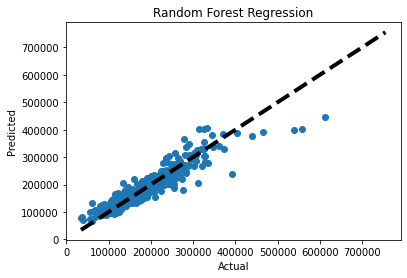

In [127]:
fig, ax = plt.subplots()
ax.scatter(y_test, yf_preds)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

#regression line

#y_test.values.reshape(-1,1)
#yt_preds.reshape(-1,1)

#y_test, y_predicted = y_test.reshape(-1,1), yt_preds.values.reshape(-1,1)

ax.set_title('Random Forest Regression')

plt.show()

## Decision Tree Regressor

In [128]:
from sklearn.tree import DecisionTreeRegressor

In [129]:
LR_Tree=DecisionTreeRegressor(max_depth=130,max_leaf_nodes=50)

In [130]:
LR_Tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=130, max_leaf_nodes=50)

In [131]:
yt_preds=LR_Tree.predict(X_test)

In [132]:
mean_squared_error(yt_preds,y_test)

1654473172.4778528

In [133]:
r2_score(y_test,yt_preds)

0.7116595416582485

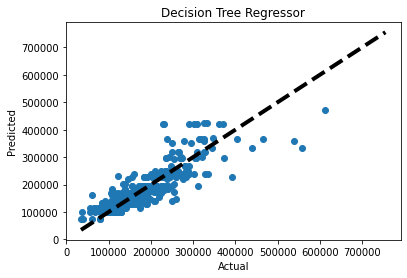

In [134]:
fig, ax = plt.subplots()
ax.scatter(y_test, yt_preds)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

ax.set_title('Decision Tree Regressor')

#regression line

#y_test.values.reshape(-1,1)
#yt_preds.reshape(-1,1)

#y_test, y_predicted = y_test.reshape(-1,1), yt_preds.values.reshape(-1,1)


plt.show()

## Stochastic Gradient Descent Regressor(SGD)


In [135]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt 


sgdr = SGDRegressor()

sgdr.fit(X_train,y_train)

score = sgdr.score(X_train, y_train)
print("R-squared:", score)

R-squared: 0.8258090823528842


In [136]:
yt_preds=sgdr.predict(X_test)

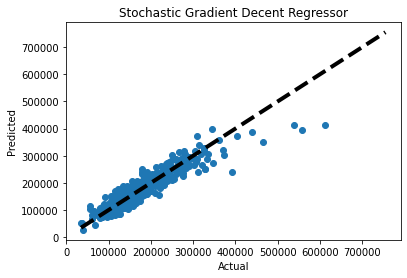

In [137]:
fig, ax = plt.subplots()
ax.scatter(y_test, yt_preds)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

ax.set_title('Stochastic Gradient Decent Regressor')

#regression line

#y_test.values.reshape(-1,1)
#yt_preds.reshape(-1,1)

#y_test, y_predicted = y_test.reshape(-1,1), yt_preds.values.reshape(-1,1)


plt.show()

# Cross Validation - K Folds

In [138]:
from sklearn.model_selection import StratifiedKFold
import numpy as np


## For Linear Regression

4 0.7735140729761457 0.05546284211253341


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


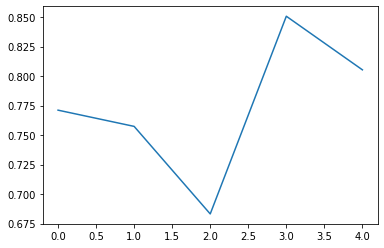

In [139]:
kf = StratifiedKFold(n_splits = 5, shuffle = True)
Rc=np.zeros(5)
LR=LinearRegression()

for count, (train, test) in enumerate(kf.split(X, y)):
  train_data = X.iloc[train]
  train_label = y.iloc[train]
  test_data = X.iloc[test]
  test_label = y.iloc[test]

 
  LR.fit(train_data,train_label)
  test_hat=LR.predict(test_data)
                      
  Rc[count] = r2_score(test_hat, test_label)
print(count, np.mean(Rc), np.std(Rc))
plt.plot(Rc)                  


## For Random Forest

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


4 0.8236028337485838 0.04968067420106679


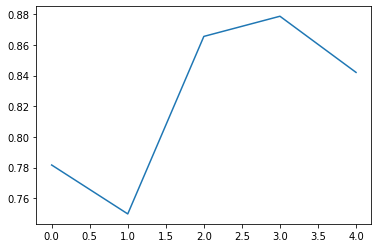

In [140]:
kf = StratifiedKFold(n_splits = 5, shuffle = True)
Rc=np.zeros(5)

sgdr = SGDRegressor()


LR=RandomForestRegressor(n_estimators = 12) 

for count, (train, test) in enumerate(kf.split(X, y)):
  train_data = X.iloc[train]
  train_label = y.iloc[train]
  test_data = X.iloc[test]
  test_label = y.iloc[test]

  # This means 12 Trees
  LR.fit(train_data,train_label)
  test_hat=LR.predict(test_data)
                      
  Rc[count] = r2_score(test_hat, test_label)
print(count, np.mean(Rc), np.std(Rc))                  


plt.plot(Rc)

## For Stochastic Gradient Descent Regressor


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=12.
  warnings.warn(


11 0.7829564049413658 0.10472008490862243


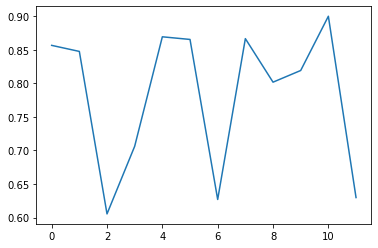

In [187]:
kf = StratifiedKFold(n_splits = 12, shuffle = True)
Rc=np.zeros(12)

LR=SGDRegressor()

for count, (train, test) in enumerate(kf.split(X, y)):
  train_data = X.iloc[train]
  train_label = y.iloc[train]
  test_data = X.iloc[test]
  test_label = y.iloc[test]

  # This means 12 Trees
  LR.fit(train_data,train_label)
  test_hat=LR.predict(test_data)
                      
  Rc[count] = r2_score(test_hat, test_label)
print(count, np.mean(Rc), np.std(Rc))                  


plt.plot(Rc)

# Scoring Predicting the real challenge values


In [142]:
pd.options.display.max_rows=None ## shows all the rows
df2.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

In [143]:
df2['LotFrontage'].fillna(68, inplace = True)

In [144]:
df2.drop('Alley', axis=1, inplace=True)

In [145]:
df2['BsmtQual'] = df2['BsmtQual'].fillna(pd.Series(np.random.choice(['TA','Gd','Ex','Fa'],p=[0.45,0.43,0.1,0.02], size=len(df)),index=df.index))

In [146]:
df2['BsmtCond'] = df2['BsmtCond'].fillna(pd.Series(np.random.choice(['TA','Gd','Fa','Po'],p=[0.921,0.045,0.033,0.001], size=len(df)),index=df.index))

In [147]:
df2['BsmtExposure'].value_counts(normalize=True, dropna=False)

No     0.651816
Av     0.135024
Gd     0.097327
Mn     0.085675
NaN    0.030158
Name: BsmtExposure, dtype: float64

In [148]:
df2['BsmtExposure'] = df2['BsmtExposure'].fillna(pd.Series(np.random.choice(['No','Av','Gd','Mn'],p=[0.670,0.155,0.09,0.085], size=len(df)),index=df.index))

In [149]:
df2['BsmtFinType1'] = df2['BsmtFinType1'].fillna(pd.Series(np.random.choice(['Unf','GLQ','ALQ','BLQ','Rec','LwQ'],p=[0.30,0.30,0.15,0.10,0.10,0.05], size=len(df)),index=df.index))

In [150]:
df2['BsmtFinType2'] = df2['BsmtFinType2'].fillna(pd.Series(np.random.choice(['Unf','Rec','LwQ','BLQ','ALQ','GLQ'],p=[0.88,0.04,0.03,0.025,0.015,0.01], size=len(df)),index=df.index))

In [151]:
df2['MasVnrType'] = df2['MasVnrType'].fillna(pd.Series(np.random.choice(['None','BrkFace','Stone','BrkCmn'],p=[0.60,0.30,0.09,0.01], size=len(df)),index=df.index))

In [152]:
df2['MasVnrArea'].fillna(100.70914127423822, inplace = True)

In [153]:
df2.drop('FireplaceQu', axis=1, inplace=True)

In [154]:
df2['GarageType'].value_counts(normalize=True, dropna=False)

Attchd     0.584647
Detchd     0.268677
BuiltIn    0.067169
NaN        0.052090
Basment    0.011652
2Types     0.011652
CarPort    0.004112
Name: GarageType, dtype: float64

In [155]:
df2['GarageType'].fillna('Attchd', inplace = True)

In [156]:
df2['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace = True)

In [157]:
df2['GarageFinish'].fillna('Unf', inplace = True)

In [158]:
df['GarageQual'].fillna('TA', inplace = True)

In [159]:
df2['GarageQual'].fillna('TA', inplace = True)

In [160]:
df2['GarageCond'].fillna('TA', inplace = True)

In [161]:
df2.drop('PoolQC', axis=1, inplace=True)
df2.drop('Fence', axis=1, inplace=True)
df2.drop('MiscFeature', axis=1, inplace=True)

In [162]:
pd.options.display.max_rows=None ## shows all the rows
df2.isnull().sum()

MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       1
BsmtFinType2     0
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      1
TotRmsAbvGrd     0
Functional  

In [163]:
df2 =df2.dropna()

In [164]:
pd.options.display.max_rows=None ## shows all the rows
df2.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [165]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
df2['MSZoning']= label_encoder.fit_transform(df2['MSZoning'])
  
df2['MSZoning'].unique()

array([2, 3, 4, 1, 0])

In [166]:
df2['Street']= label_encoder.fit_transform(df2['Street'])
df2['LotShape']= label_encoder.fit_transform(df2['LotShape'])

df2['LotConfig']= label_encoder.fit_transform(df2['LotConfig'])

df2['LandContour']= label_encoder.fit_transform(df2['LandContour'])
df2['LandSlope']= label_encoder.fit_transform(df2['LandSlope'])
df2['Neighborhood']= label_encoder.fit_transform(df2['Neighborhood'])
df2['Condition1']= label_encoder.fit_transform(df2['Condition1'])
df2['Condition2']= label_encoder.fit_transform(df2['Condition2'])
df2['BldgType']= label_encoder.fit_transform(df2['BldgType'])
df2['RoofStyle']= label_encoder.fit_transform(df2['RoofStyle'])
df2['RoofMatl']= label_encoder.fit_transform(df2['RoofMatl'])
df2['Exterior1st']= label_encoder.fit_transform(df2['Exterior1st'])
df2['Exterior2nd']= label_encoder.fit_transform(df2['Exterior2nd'])
df2['MasVnrType']= label_encoder.fit_transform(df2['MasVnrType'])
df2['ExterQual']= label_encoder.fit_transform(df2['ExterQual'])
df2['ExterCond']= label_encoder.fit_transform(df2['ExterCond'])

df2['Foundation']= label_encoder.fit_transform(df2['Foundation'])
df2['BsmtQual']= label_encoder.fit_transform(df2['BsmtQual'])
df2['BsmtCond']= label_encoder.fit_transform(df2['BsmtCond'])
df2['BsmtExposure']= label_encoder.fit_transform(df2['BsmtExposure'])
df2['BsmtFinType1']= label_encoder.fit_transform(df2['BsmtFinType1'])

df2['BsmtFinType2']= label_encoder.fit_transform(df2['BsmtFinType2'])
df2['Heating']= label_encoder.fit_transform(df2['Heating'])
df2['HeatingQC']= label_encoder.fit_transform(df2['HeatingQC'])
df2['CentralAir']= label_encoder.fit_transform(df2['CentralAir'])
df2['Electrical']= label_encoder.fit_transform(df2['Electrical'])
df2['KitchenQual']= label_encoder.fit_transform(df2['KitchenQual'])
df2['Functional']= label_encoder.fit_transform(df2['Functional'])
df2['GarageType']= label_encoder.fit_transform(df2['GarageType'])

df2['GarageFinish']= label_encoder.fit_transform(df2['GarageFinish'])
df2['GarageQual']= label_encoder.fit_transform(df2['GarageQual'])
df2['GarageCond']= label_encoder.fit_transform(df2['GarageCond'])
df2['PavedDrive']= label_encoder.fit_transform(df2['PavedDrive'])
df2['SaleType']= label_encoder.fit_transform(df2['SaleType'])
df2['SaleCondition']= label_encoder.fit_transform(df2['SaleCondition'])

df2['HouseStyle'] =label_encoder.fit_transform(df2['HouseStyle'])


In [167]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler() 

In [168]:
df2.shape

(1448, 73)

In [169]:
df2

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0             20         2         80.0    11622       1         3   
1             20         3         81.0    14267       1         0   
2             60         3         74.0    13830       1         0   
3             60         3         78.0     9978       1         0   
4            120         3         43.0     5005       1         0   
5             60         3         75.0    10000       1         0   
6             20         3         68.0     7980       1         0   
7             60         3         63.0     8402       1         0   
8             20         3         85.0    10176       1         3   
9             20         3         70.0     8400       1         3   
10           120         2         26.0     5858       1         0   
11           160         4         21.0     1680       1         3   
12           160         4         21.0     1680       1         3   
13           160         3         24.0     2280       1         3   
14           120         3         24.0     2280       1         3   
15            60         3        102.0    12858       1         0   
16            20         3         94.0    12883       1         0   
17            20         3         90.0    11520       1         3   
18            20         3         79.0    14122       1         0   
19            20         3        110.0    14300       1         3   
20            60         3        105.0    13650       1         3   
21           120         3         41.0     7132       1         0   
22            20         3        100.0    18494       1         0   
23           120         3         43.0     3203       1         3   
24            80         3         67.0    13300       1         0   
25            60         3         63.0     8577       1         0   
26            60         3         60.0    17433       1         1   
27            20         3         73.0     8987       1         3   
28            20         1         92.0     9215       1         3   
29            20         1         84.0    10440       1         3   
30            60         3         70.0    11920       1         3   
31            30         2         70.0     9800       1         3   
32            20         3         39.0    15410       1         0   
33            60         3         85.0    13143       1         0   
34            60         3         88.0    11134       1         3   
35           120         1         25.0     4835       1         0   
36           160         1         39.0     3515       1         3   
37           160         1         30.0     3215       1         3   
38           160         1         24.0     2544       1         3   
39           160         1         24.0     2544       1         3   
40           160         1         68.0     2980       1         3   
41           160         1         68.0     2403       1         0   
42            20         1         57.0    12853       1         0   
43            60         1         68.0     7379       1         0   
44            20         1         80.0     8000       1         3   
45            20         3         68.0    10456       1         0   
46            60         3         80.0    10791       1         3   
47            50         3         68.0    18837       1         0   
48            60         3         80.0     9600       1         3   
49            20         3         80.0     9600       1         3   
50            20         3         90.0     9900       1         3   
51            20         3         88.0     9680       1         3   
52            80         3         68.0    10600       1         0   
53            90         3         98.0    13260       1         0   
54            50         3         68.0     9724       1         3   
55            50         3        120.0    17360       1         3   
56            85

In [170]:
newdf2=df2[k_best_scores['Features']]

## Random Forest for prediction

In [171]:
F_Pred=scaler.fit_transform(newdf2)
yf_preds=LR_Forest.predict(F_Pred)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [172]:
yf_preds.shape

(1448,)

In [173]:
yf_preds.mean()


187045.0520198094

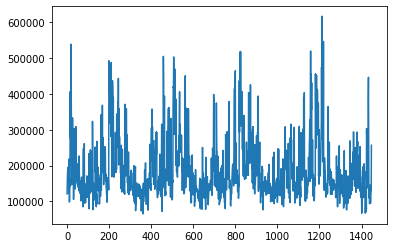

In [174]:
plt.plot(yf_preds)

## Stochastic Gradient Descent for predicting

In [175]:
10F_Pred=scaler.fit_transform(newdf2)
yf_preds=LR_Forest.predict(F_Pred)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [176]:
yt_preds=sgdr.predict(F_P1ed)

NotFittedError: ignored

In [ ]:
yt_preds.shape

In [ ]:
type(yt_preds)

In [ ]:
F_Pred.shape

In [ ]:
type(F_Pred)

In [ ]:
newdf2['SalePrice']=pd.Series(yt_preds)

In [ ]:
newdf2.head()

# EDA

In [ ]:
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']

for feature in year_features:
    ax = df.groupby([feature])['SalePrice'].median().plot()
    plt.ylabel("Median House Price")
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

df_f=df.drop(['TotalBsmtSF','GarageCars','GarageYrBlt','TotRmsAbvGrd'],axis=1)
plt.figure(figsize=(15,15))
df_f.corr()['SalePrice'].plot(kind='barh');

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

import seaborn as sns

#Plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

#Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

import plotly.io as pio
pio.templates.default = "gridon"

#Subplots
from plotly.subplots import make_subplots

## Overall quality and condition

In [ ]:
cat2=['OverallQual','OverallCond']

In [ ]:
#Changing Overall quality and condition's values to categorical values
#OverallQual: Rates the overall material and finish of the house
df_new=df   
df_new['OverallQual'] = df_new['OverallQual'].replace({10:'Very Exc',9:'Exc',8:'VG',7:'Good',
                                                      6:'Abv Avg',5:'Avg',4:'Bel Avg',3:'Fair',
                                                      2:'Poor',1:'Very Poor'})

#Covert to object
df_new['OverallQual'] = df_new['OverallQual'].astype(object)

#OverallCond: Rates the overall condition of the house

df_new['OverallCond'] = df_new['OverallCond'].replace({10:'Very Exc',9:'Exc',8:'VG',7:'Good',
                                                      6:'Abv Avg',5:'Avg',4:'Bel Avg',3:'Fair',
                                                      2:'Poor',1:'Very Poor'})

#Covert to object
df_new['OverallCond'] = df_new['OverallCond'].astype(object)


In [ ]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,1,1)
table = df_new.groupby(['OverallQual'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df_new,x='OverallQual',y="SalePrice",order=table['OverallQual'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,1,2)
table = df_new.groupby(['OverallCond'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df_new,x='OverallCond',y="SalePrice",order=table['OverallCond'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("House price wrt to Overall Quality and Condition",fontsize=25);

In [ ]:
fig = px.histogram(df_new, x="SalePrice", color='OverallQual',barmode="overlay",title="Overall Quality of the house")
fig.update_layout(height=500)
fig.show()

fig = px.histogram(df_new, x="SalePrice", color='OverallCond',barmode="overlay",title="Overall Condition of the house")
fig.update_layout(height=500)
fig.show()

Overall Quality :- It's obvious that if overall quality of the property is good , the Price will be high and we can clearly see that in the above box plot.This tells us that Overall Quality is an important feature in predicting Sale Price of the house.The below distribution gives us a better look of the variation in price with the overall quality.

Overall Condition :- Most of the houses are in average condition and very few are in excellent condition as seen in the box plot and the below distribution.Properties in average and excellent condition are having average price high and the properties in very bad condition will have low sale price.

## External quality and condition

In [ ]:
cat6=['ExterQual', 'ExterCond']

ExterQual: Evaluates the quality of the material on the exterior

ExterCond: Evaluates the present condition of the material on the exterior

In [ ]:
fig = px.histogram(df, x="SalePrice", color='ExterQual',barmode="overlay",title='Exterior Quality')
fig.update_layout(height=400)
fig.show()

fig = px.histogram(df, x="SalePrice", color='ExterCond',barmode="overlay",title="Exterior Condition")
fig.update_layout(height=400)
fig.show()

**Exterior Quality :-** If the exterior quality is good or excellent , The price will be more .Most of the properties have average exterior quality and very few have excellent exterior quality.

**Exterior Condition :- ** Average,good and excellent exterior condition properties will have higher sale price.And here also most of the properties have average exterior condition and only 3 properties in our dataset have excellent exterior condition.

## Garage effect on price

In [ ]:
cat8=['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond']

GarageType: Garage location

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageQual: Garage quality

GarageCond: Garage condition

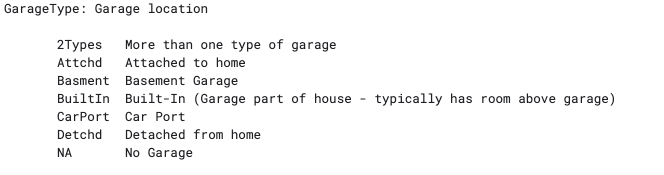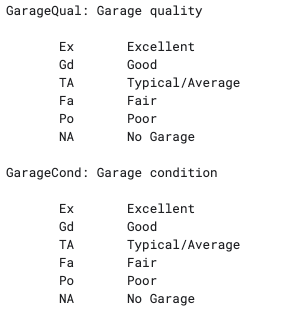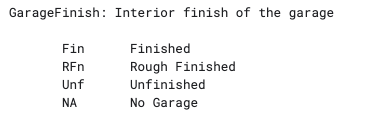

In [ ]:
fig = plt.figure(constrained_layout=True,figsize=(15,15))
gs = GridSpec(3, 3, figure=fig)

plt.subplot(gs[0,:])
a1 = sns.boxenplot(data=df,x="GarageType",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:-1])
sns.distplot(df[df['GarageFinish']=='RFn']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Unf']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Fin']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Not Known']['SalePrice'])

plt.legend('upper right' , labels = ['RFn','Unf','Fin','Not Known'])
plt.xlabel("SalePrice")
plt.title("Garage Finish")

plt.subplot(gs[1:,-1])
a1 = sns.boxplot(data=df,x="GarageCars",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,0])
a1 = sns.stripplot(data=df,x="GarageQual",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,-2])
a1 = sns.stripplot(data=df,x="GarageCond",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

# Clustering


In [ ]:
data_new = newdf2.drop(['Condition1','Condition2','BldgType','ExterCond','BsmtCond',\
'CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','MSZoning','SaleType','SaleCondition',\
                     'LandContour','BsmtFinType2'],axis=1)
data_new.drop(['TotalBsmtSF','GarageCars','GarageYrBlt','TotRmsAbvGrd'],axis=1,inplace=True)

categ = list(set(data_new.columns) - set(data_new.corr()['SalePrice'].index))

data_targ = df.copy()
for i in categ:
    data_targ[i] = data_targ[i].factorize()[0]
data_targ.head(3)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler, RobustScaler
data_targ.drop(['SalePrice'],axis=1,inplace=True)
nrm = Normalizer()
nrm.fit(data_targ)
normal_data = nrm.transform(data_targ)

In [ ]:
#Apply visualization method - TSNE for clustering our data.

from sklearn.manifold import TSNE
tsn = TSNE(random_state=20)
res_tsne = tsn.fit_transform(normal_data)
plt.figure(figsize=(8,8))
sns.scatterplot(res_tsne[:,0],res_tsne[:,1]);

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.decomposition import PCA as PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples

# Cluster Algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as AggClus
import scipy.cluster.hierarchy as sch

# Defaults
import warnings
import os


In [ ]:
# Cluster Visualization
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.decomposition import PCA as PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples

# Cluster Algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as AggClus
import scipy.cluster.hierarchy as sch



link = ward(res_tsne)
vb = sch.fcluster(link,t=300, criterion='distance')
fig = plt.figure(figsize=(25,25))
ax1 = fig.add_subplot(3,3,1)
pd.value_counts(vb).plot(kind='barh')
ax2 = fig.add_subplot(3,3,2)
axpl_2 = sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],hue=vb,palette="Set1");
#axpl_2.legend_.remove()

In [ ]:
sns.set(style='white')
plt.figure(figsize=(10,7))
#link = ward(res_tsne)
dendrogram(link)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [300,300],'--', c='k')
ax.plot(bounds,'--', c='k')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],\
                     hue=data_new['SalePrice'],s=70,palette="hot");#,palette="RdBu");

In [ ]:
df.columns

In [ ]:
#most_sign = ['OverallQual','GrLivArea','GarageQual,'FullBath']
most_sign = ['OverallQual','ExterQual']
n_row = 2
n_col = 2
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(15,15))
sns.set(font_scale=1)
sns.axes_style("whitegrid")
for i in enumerate(most_sign):
    qq = sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],ax=axes[i[0]//n_row,i[0]%n_col],\
                     hue=data_new[i[1]],s=70,palette="RdBu");
plt.legend().set_title('')
plt.tight_layout()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression